Probability of Error: 0.23155


(-75.0, 75.0)

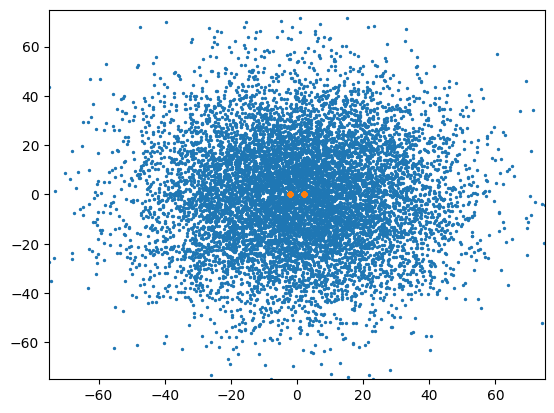

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# Define the parameters
K = 10000
a = 2
H = np.array([[1, 0], [0, 0.01]])

# Generate the random variables
x1 = np.random.choice([-a, a], size=(K, 1))
x2 = np.random.choice([-a, a], size=(K, 1))

# Combine x1 and x2 into one matrix (K x 2)
x = np.hstack([x1, x2])

# Generate w (complex Gaussian noise)
w = np.random.normal(0, np.sqrt(0.05), (K, 2)) + 1j * np.random.normal(0, np.sqrt(0.05), (K, 2))

# Compute y = Hx + w
y = np.dot(x, H.T) + w

# Compute the inverse of H
H_inv = np.linalg.inv(H)

# Estimate x at the receiver: x_hat = H^-1 * y
x_hat = np.dot(y, H_inv.T)

# Detect x from x_hat based on the real part
x_detected = np.where(np.real(x_hat) > 0, a, -a)

# Compute the number of errors
errors = np.sum(x != x_detected)

# Compute the probability of error
P_e = errors / (K * 2)  # Since each symbol has two elements (x1, x2)

# Print the probability of error
print(f"Probability of Error: {P_e}")

plt.scatter(x_hat.real, x_hat.imag, s=2, alpha=1, label="Received Symbols")
plt.scatter(x.real, x.imag, s=10, label="BPSK Constellation Points")
plt.xlim([-75, 75])
plt.ylim([-75, 75])


L-MMSE Probability of Error: 0.2345


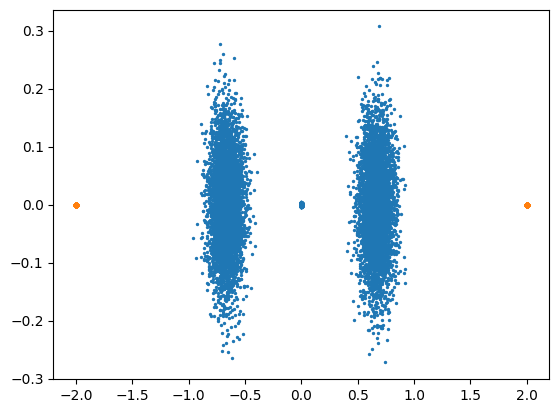

In [13]:
import numpy as np

# Define the parameters
K = 10000  # Number of symbols
a = 2  # Symbol value
H = np.array([[1, 0], [0, 0.01]])

# Generate the random transmitted symbols (x1, x2)
x1 = np.random.choice([-a, a], size=(K, 1))
x2 = np.random.choice([-a, a], size=(K, 1))

# Combine x1 and x2 into one matrix (K x 2)
x = np.hstack([x1, x2])

# Generate w (complex Gaussian noise)
w = np.random.normal(0, np.sqrt(0.05), (K, 2)) + 1j * np.random.normal(0, np.sqrt(0.05), (K, 2))

# Compute the received signal y = Hx + w
y = np.dot(x, H.T) + w

# Regularization parameter (lambda)
Mt = 2  # Number of transmitted symbols (2 in this case)
rho = 1  # You can adjust this for regularization strength
lambda_reg = Mt / rho  # Regularization term lambda

# L-MMSE detector: x_hat = (H^H H + lambda I)^-1 H^H y
H_H = np.conj(H.T)  # Hermitian (conjugate transpose) of H
I = np.eye(Mt)  # Identity matrix of size Mt x Mt
H_H_H = np.dot(H_H, H)  # H^H * H
lambda_I = lambda_reg * I  # Lambda * I (regularization term)

# Compute the L-MMSE estimate
x_hat_LMMSE = np.dot(np.linalg.inv(H_H_H + lambda_I), np.dot(H_H, y.T))

# Detect x from x_hat_LMMSE based on the real part
x_detected_LMMSE = np.where(np.real(x_hat_LMMSE.T) > 0, a, -a)

# Compute the number of errors
errors_LMMSE = np.sum(x != x_detected_LMMSE)

# Compute the probability of error
P_e_LMMSE = errors_LMMSE / (K * 2)  # Since each symbol has two elements (x1, x2)

# Print the results
print(f"L-MMSE Probability of Error: {P_e_LMMSE}")
plt.scatter(x_hat_LMMSE.real, x_hat_LMMSE.imag, s=2, alpha=1, label="Received Symbols")
plt.scatter(x.real, x.imag, s=10, label="BPSK Constellation Points")
